In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-192k011f
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-192k011f
  Resolved https://github.com/facebookresearch/detectron2.git to commit eddac5d5b4fce9b5eba5518f9ee348fa3a531407
  Preparing metadata (setup.py) ... done


In [ ]:
import torch, torchvision
print(torch.cuda.is_available())
import os, pickle ,random
import cv2 as cv
import matplotlib.pyplot as plt

True


In [ ]:
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import ColorMode

In [ ]:
config_file_path = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
checkpoint_url = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
output_dir = "./instance_segmentation"
num_classes = 1
device = "cuda"

In [ ]:
train_dataset_name = "cumbaru_train2"
train_images_path = "/content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/train"
train_json_annot_path = "/content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/train/train.json"
val_dataset_name = "cumbaru_val2"
val_images_path = "/content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/val"
val_json_annot_path = "/content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/val/val.json"

In [ ]:
register_coco_instances(name = train_dataset_name, metadata = {},
                       json_file = train_json_annot_path,
                        image_root = train_images_path)

In [ ]:
register_coco_instances(name = val_dataset_name, metadata = {},
                       json_file = val_json_annot_path,
                        image_root = val_images_path)

In [ ]:
cfg_save_path = "IS_cfg.pickle"

In [ ]:
def plot_samples(dataset_name, n = 1):
    dataset_custom = DatasetCatalog.get(dataset_name)
    dataset_custom_metadata = MetadataCatalog.get(dataset_name)

    for s in random.sample(dataset_custom, n):
        img = cv.imread(s["file_name"])
        v = Visualizer(img[:,:,::-1], metadata=dataset_custom_metadata, scale = 0.5)
        v = v.draw_dataset_dict(s)
        plt.figure(figsize = (5,10))
        plt.imshow(v.get_image())
        plt.show()

In [ ]:
def plot_samples(dataset_name, n = 1):
    dataset_custom = DatasetCatalog.get(dataset_name)
    dataset_custom_metadata = MetadataCatalog.get(dataset_name)

    for s in random.sample(dataset_custom, n):
        print(s["file_name"])
        img = cv.imread(s["file_name"])
        v = Visualizer(img[:,:,::-1], metadata=dataset_custom_metadata, scale = 0.5)
        v = v.draw_dataset_dict(s)
        plt.figure(figsize = (5,10))
        plt.imshow(v.get_image())
        plt.show()

[06/27 12:36:21 d2.data.datasets.coco]: Loaded 313 images in COCO format from /content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/train/train.json
/content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/train/22_09_18_DJI_0224.JPG


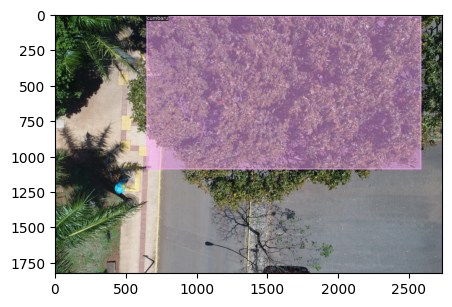

In [ ]:
#Verifying
plot_samples(dataset_name = train_dataset_name, n = 1)

In [ ]:
def get_train_cfg(config_file_path, checkpoint_url, train_dataset_name, val_dataset_name, num_classes, device, output_dir):
    cfg = get_cfg()

    cfg.merge_from_file(model_zoo.get_config_file(config_file_path))
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
    cfg.DATASETS.TRAIN = (train_dataset_name,)
    cfg.DATASETS.TEST = (val_dataset_name,)

    cfg.DATALOADER.NUM_WORKERS = 2

    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025
    cfg.SOLVER.MAX_ITER = 1000
    cfg.SOLVER.STEPS = []

    cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes
    cfg.MODEL.DEVICE = device
    cfg.OUTPUT_DIR = output_dir

    return cfg

In [ ]:
def main():
    cfg = get_train_cfg(config_file_path, checkpoint_url, train_dataset_name, val_dataset_name, num_classes, device, output_dir)

    with open(cfg_save_path,"wb") as f:
        pickle.dump(cfg, f, protocol = pickle.HIGHEST_PROTOCOL)

    os.makedirs(cfg.OUTPUT_DIR, exist_ok = True)

    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume = False)

    trainer.train()

In [ ]:
main()

[06/27 12:36:30 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[06/27 12:36:31 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/27 12:37:27 d2.utils.events]:  eta: 0:32:14  iter: 19  total_loss: 1.335  loss_cls: 0.5192  loss_box_reg: 0.06234  loss_mask: 0.6938  loss_rpn_cls: 0.05077  loss_rpn_loc: 0.01107    time: 2.1066  last_time: 1.9691  data_time: 1.6839  last_data_time: 1.4925   lr: 4.9953e-06  max_mem: 2578M
[06/27 12:38:20 d2.utils.events]:  eta: 0:31:44  iter: 39  total_loss: 1.237  loss_cls: 0.4582  loss_box_reg: 0.0628  loss_mask: 0.6839  loss_rpn_cls: 0.04594  loss_rpn_loc: 0.01081    time: 2.1854  last_time: 1.8311  data_time: 1.5688  last_data_time: 1.4063   lr: 9.9902e-06  max_mem: 2578M
[06/27 12:39:05 d2.utils.events]:  eta: 0:30:59  iter: 59  total_loss: 1.131  loss_cls: 0.3541  loss_box_reg: 0.06929  loss_mask: 0.6554  loss_rpn_cls: 0.03736  loss_rpn_loc: 0.009239    time: 2.1958  last_time: 1.9553  data_time: 1.6822  last_data_time: 1.4633   lr: 1.4985e-05  max_mem: 2667M
[06/27 12:39:49 d2.utils.events]:  eta: 0:30:20  iter: 79  total_loss: 0.9946  loss_cls: 0.2592  loss_box_reg: 0.06292

In [ ]:
from detectron2.engine import DefaultPredictor
cfg_save_path = "IS_cfg.pickle"

with open(cfg_save_path, "rb") as f:
    cfg = pickle.load(f)

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

predictor = DefaultPredictor(cfg)

[06/27 13:13:59 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./instance_segmentation/model_final.pth ...


In [ ]:
def on_image(image_path,predictor):
    im = cv.imread(image_path)
    outputs = predictor(im)
    v = Visualizer(im[:,:,::-1], {"thing_classes":['cumbaru']}, scale=0.5, instance_mode = ColorMode.SEGMENTATION)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    plt.figure(figsize = (5,10))
    plt.imshow(v.get_image())

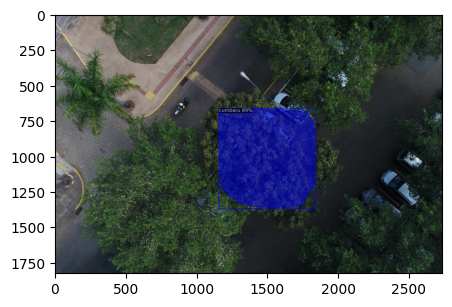

In [ ]:
image_path = "/content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/val/31_08__18_DJI_0107.JPG"
on_image(image_path, predictor)

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("cumbaru_val2", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "cumbaru_val2")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[06/27 13:14:04 d2.data.datasets.coco]: Loaded 79 images in COCO format from /content/drive/MyDrive/Cumbaru_5_Fold_Sensors everything/folder_1/val/val.json
[06/27 13:14:04 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/27 13:14:04 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[06/27 13:14:04 d2.data.common]: Serializing 79 elements to byte tensors and concatenating them all ...
[06/27 13:14:04 d2.data.common]: Serialized dataset takes 0.03 MiB
[06/27 13:14:04 d2.evaluation.evaluator]: Start inference on 79 batches
[06/27 13:14:18 d2.evaluation.evaluator]: Inference done 11/79. Dataloading: 0.7529 s/iter. Inference: 0.1260 s/iter. Eval: 0.1034 s/iter. Total: 0.9823 s/iter. ETA=0:01:06
[06/27 13:14:23 d2.evaluation.evaluator]: Inference done 15/79. Dataloading: 0.8771 s/iter. Inference: 0.1387 s/iter. Eval: 0.1228 

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!zip -r '/content/drive/MyDrive/cumbaru_mask_rcnn_detectron2_predict.zip' '/content/output'

  adding: content/output/ (stored 0%)
  adding: content/output/coco_instances_results.json (deflated 85%)
  adding: content/output/instances_predictions.pth (deflated 85%)


In [ ]:
!zip -r '/content/drive/MyDrive/cumbaru_mask_rcnn_detectron2_predict2.zip' '/content/instance_segmentation'

  adding: content/instance_segmentation/ (stored 0%)
  adding: content/instance_segmentation/metrics.json (deflated 79%)
  adding: content/instance_segmentation/model_final.pth (deflated 7%)
  adding: content/instance_segmentation/last_checkpoint (stored 0%)
  adding: content/instance_segmentation/events.out.tfevents.1687869455.081ef032d146.15461.0 (deflated 72%)
  adding: content/instance_segmentation/events.out.tfevents.1687867047.081ef032d146.3786.0 (deflated 71%)
